# Uber Trips Analysis

In [44]:

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("uber.csv")

In [4]:
df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [5]:
df.shape

(1028136, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


### Dividing Date column to Day, Hour, Weekday

In [18]:
df.rename(columns={'Date/Time': "Date"}, inplace=True)

In [20]:
df.head()

,Date,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [21]:
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
df['Day'] = df['Date'].apply(lambda x: x.day)
df['Hour'] = df['Date'].apply(lambda x: x.hour)
df['Weekday'] = df['Date'].apply(lambda x: x.weekday())


In [25]:
df.head()

,Date,Lat,Lon,Base,Day,Hour,Weekday
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


###  Visuliazing the density

Text(0, 0.5, 'Density of rides')

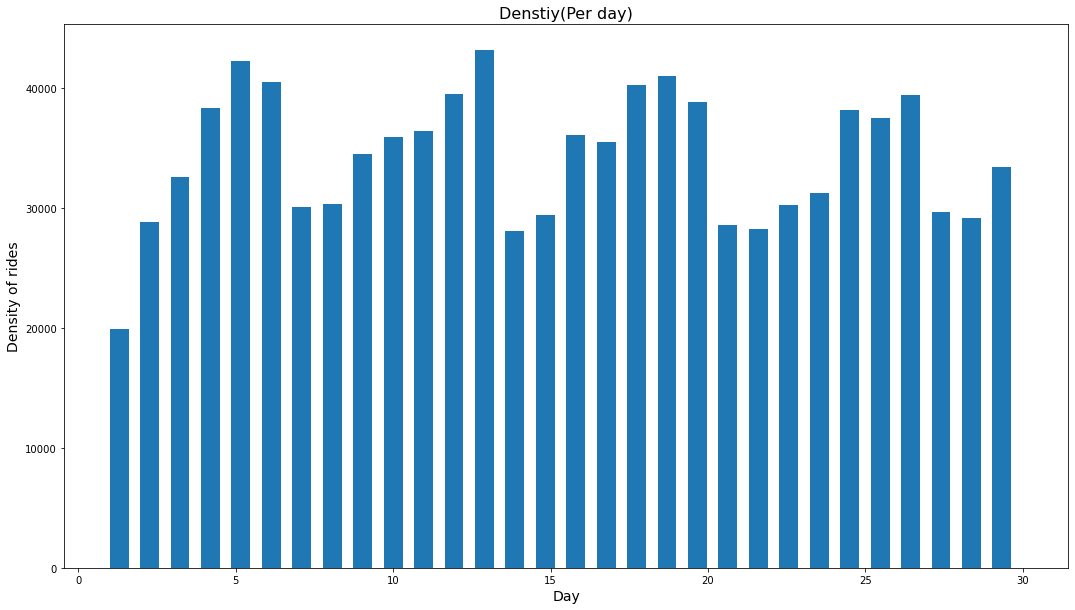

In [32]:
figure, ax = plt.subplots(figsize = (18, 10))
plt.hist(df.Day, width = 0.6, bins = 30)
plt.title('Denstiy(Per day)', fontsize = 16)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Density of rides', fontsize = 14)

C:\Users\EVA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Day', ylabel='Density'>

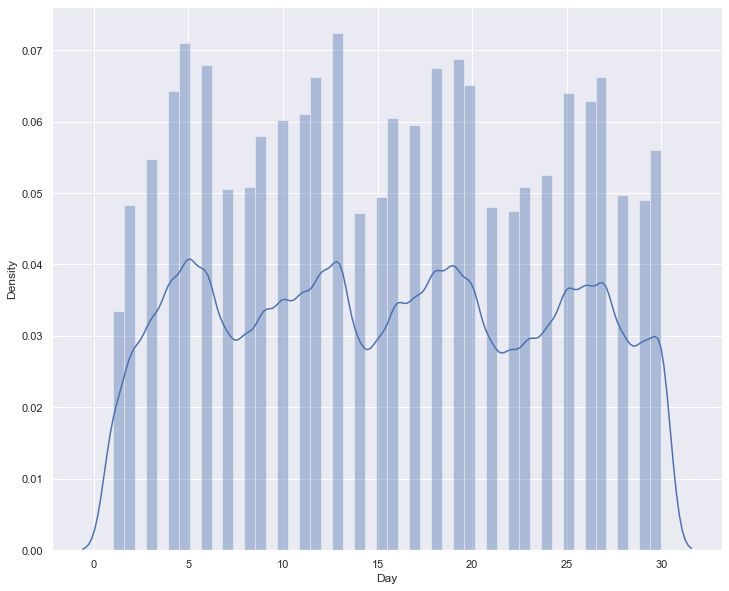

In [45]:
sns.set(rc={'figure.figsize':(12, 10)})
sns.distplot(df["Day"])

### Density of trips per Weekday

Text(0, 0.5, 'Density of rides')

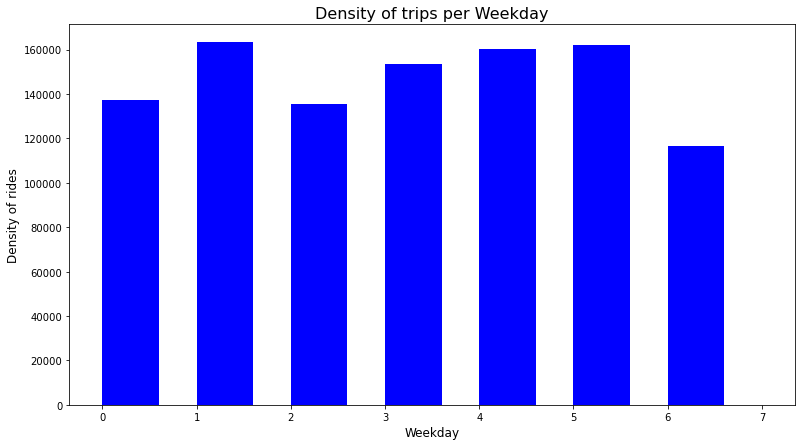

In [37]:
figure, ax = plt.subplots(figsize = (13,7))
plt.hist(df.Weekday, width = 0.6, range=(0, 7), bins = 7, color = 'blue')
plt.title('Density of trips per Weekday', fontsize = 16)
plt.xlabel('Weekday', fontsize = 12)
plt.ylabel("Density of rides", fontsize = 12)

C:\Users\EVA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekday', ylabel='Density'>

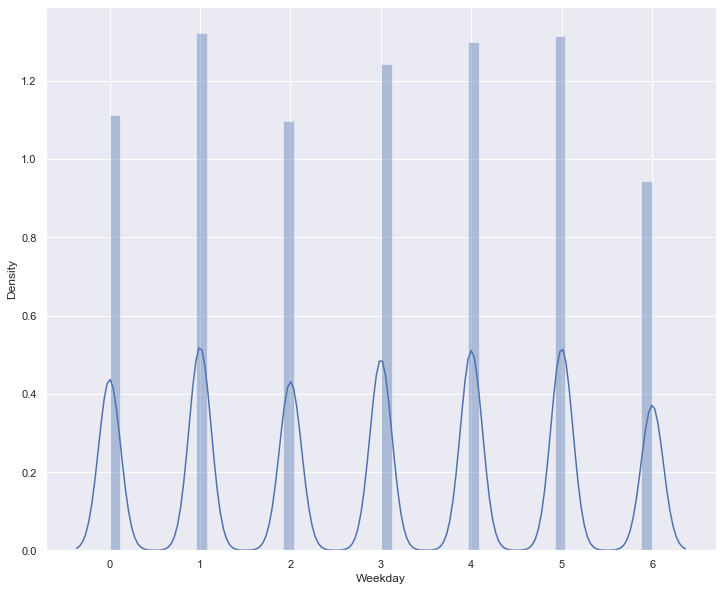

In [47]:
sns.distplot(df['Weekday'])

###  Density of trips per Hour

Text(0, 0.5, 'Density of rides')

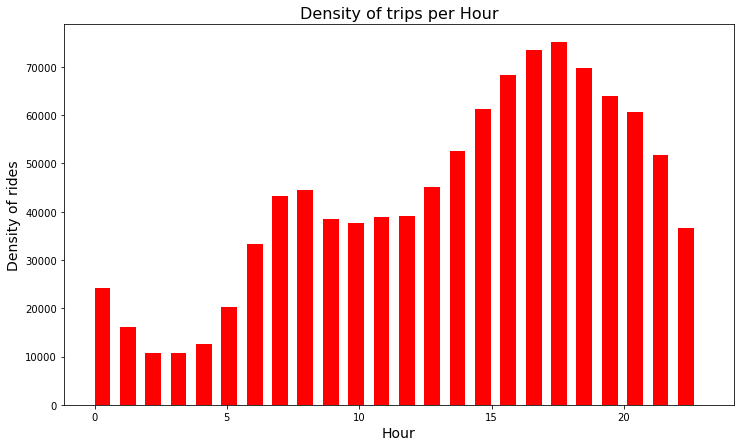

In [39]:
figure, ax = plt.subplots(figsize = (12, 7))
plt.hist(df.Hour, width = 0.6, bins=24, color = 'red')
plt.title('Density of trips per Hour', fontsize = 16)
plt.xlabel("Hour", fontsize = 14)
plt.ylabel('Density of rides', fontsize = 14)

C:\Users\EVA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hour', ylabel='Density'>

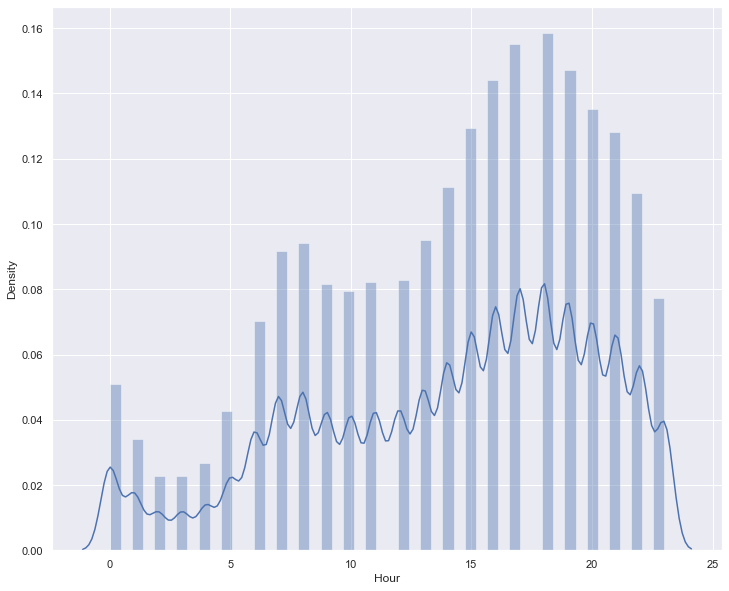

In [50]:
sns.distplot(df['Hour'])

###### The number of rides appears to steadily decline from 01:00 to 16:00 and then gradually increase from 05:00 onwards until it reaches 18:00, which is the hour with the most rides.

###  Density of rides per location

Text(0, 0.5, 'Density of rides')

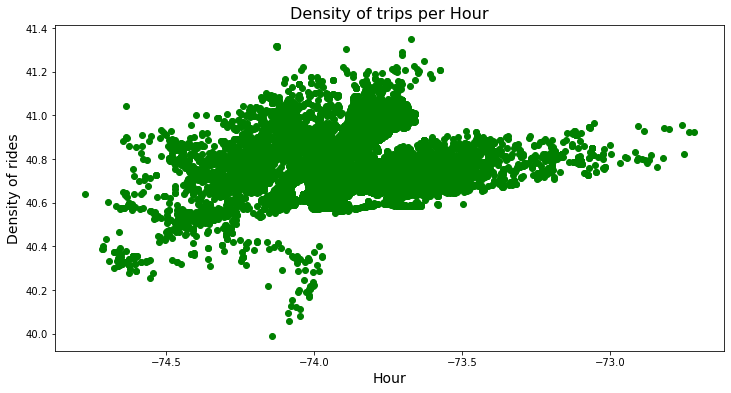

In [42]:
figure, ax = plt.subplots(figsize = (12,6))
x = df.Lon
y = df.Lat
plt.scatter(x, y, color='green')
plt.title('Density of trips per Hour', fontsize = 16)
plt.xlabel("Hour", fontsize = 14)
plt.ylabel('Density of rides', fontsize = 14)